<h2> Import libraries </h2>

In [1]:
import os
import numpy as np
import pandas as pd
import swifter

import librosa
import librosa.display


from matplotlib import pyplot as plt
plt.style.use('ggplot')

import IPython.display as ipd

import warnings
warnings.simplefilter('ignore')

In [2]:
AUDIO_SIGNAL_PATH = 'pkl_files/audio.npy'
TARGET_PATH = 'pkl_files/target.csv'
DIRECTORY =  'audio dataset/'
MELSPECTROGRAM_PATH = 'pkl_files/mel_spectrogram.npy'
MFCC_PATH = 'pkl_files/mfcc.npy'

<h2> Load Data </h2>

In [3]:
# load Audio signal data, labels
audio = np.load(AUDIO_SIGNAL_PATH, allow_pickle=True) 
target = pd.read_csv(TARGET_PATH, delimiter=',', names=['target'])

In [4]:
# load (stop) sample
stop_dir = os.path.join(DIRECTORY, 'stop')
stop_file = os.path.join(stop_dir, os.listdir(stop_dir)[1])
stop_sample, sample_rate = librosa.load(stop_file)

print(stop_file)
ipd.Audio(stop_file)

FileNotFoundError: [Errno 2] No such file or directory: 'audio dataset/stop'

In [5]:
df = pd.DataFrame({'audio':audio.reshape(-1, ), 'target':target.values.reshape(-1, )})
df['period'] = df.audio.swifter.apply(len) / 22050

Pandas Apply:   0%|          | 0/30561 [00:00<?, ?it/s]

<h2> Clean Data </h2>

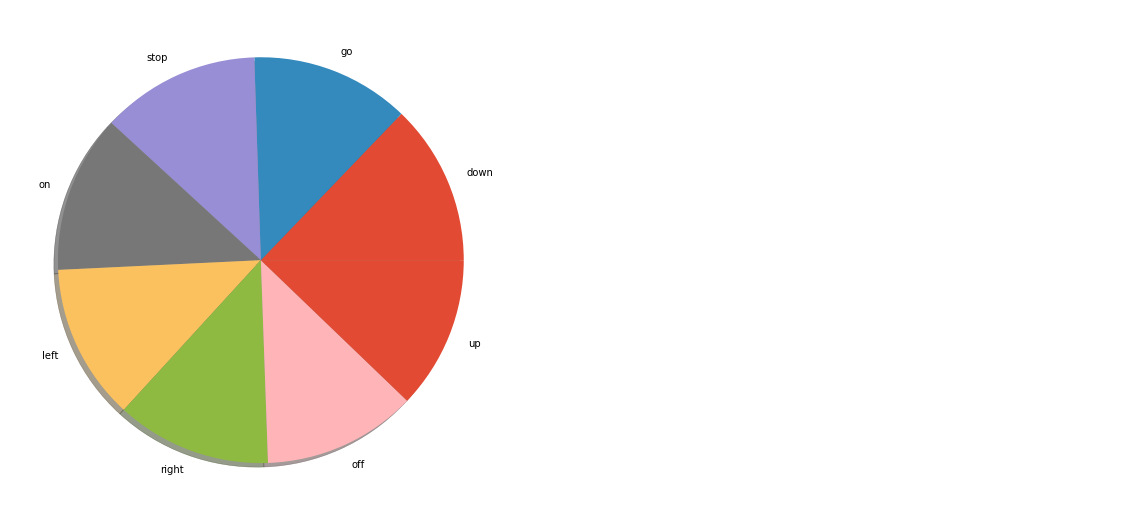

In [6]:
# show that if ditribution of less than 0.1 sec signals is fairly distributed or not

fig, axs = plt.subplots(1, 2, figsize=(20, 15))
axs[0].pie(df.target.value_counts(), labels=df.target.value_counts().index, shadow=True)
axs[1].pie(df.loc[df['period']<0.1, 'target'].value_counts()
        , labels=df.loc[df['period']<0.1, 'target'].value_counts().index, shadow=True)
plt.show()

In [14]:
df.drop(df[df['period']<0.1].index, inplace=True)
df.index = np.arange(len(df))

In [20]:
# np.save(DROPPED_TARGET_PATH, df['target'].values, fmt='%s')
# np.save(DROPPED_SIGNAL_PATH, df['audio'].values, allow_pickle=True)

<h2> Feature Engineering </h2>

In [62]:
# transform signal into mfcc form

mfcc = []
for signal in df['audio'].values:
    mfcc_f = liborsa.feature.mfcc(signal, n_mfcc=13)
    mfcc.append(mfcc_f)

ValueError: Wrong number of items passed 572, placement implies 1

In [58]:
mfcc = np.array(mfcc)

In [66]:
np.save(MFCC_PATH, mfcc, allow_pickle=True)

In [ ]:
# np.load(MFCC, allow_pickle=True)

In [18]:
# transform signal into melspectrogram form

mel_spec = []
for signal in df['audio']:
    mel_spec_f = librosa.feature.melspectrogram(signal)
    mel_spec.append(mel_spec_f)

ValueError: Length of values does not match length of index

In [63]:
np.save(MELSPECTROGRAM_PATH, mel_spec, allow_pickle=True)

In [ ]:
# np.load(MELSPECTROGRAM, allow_pickle=True)

<h2> Data Visualization </h2>

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

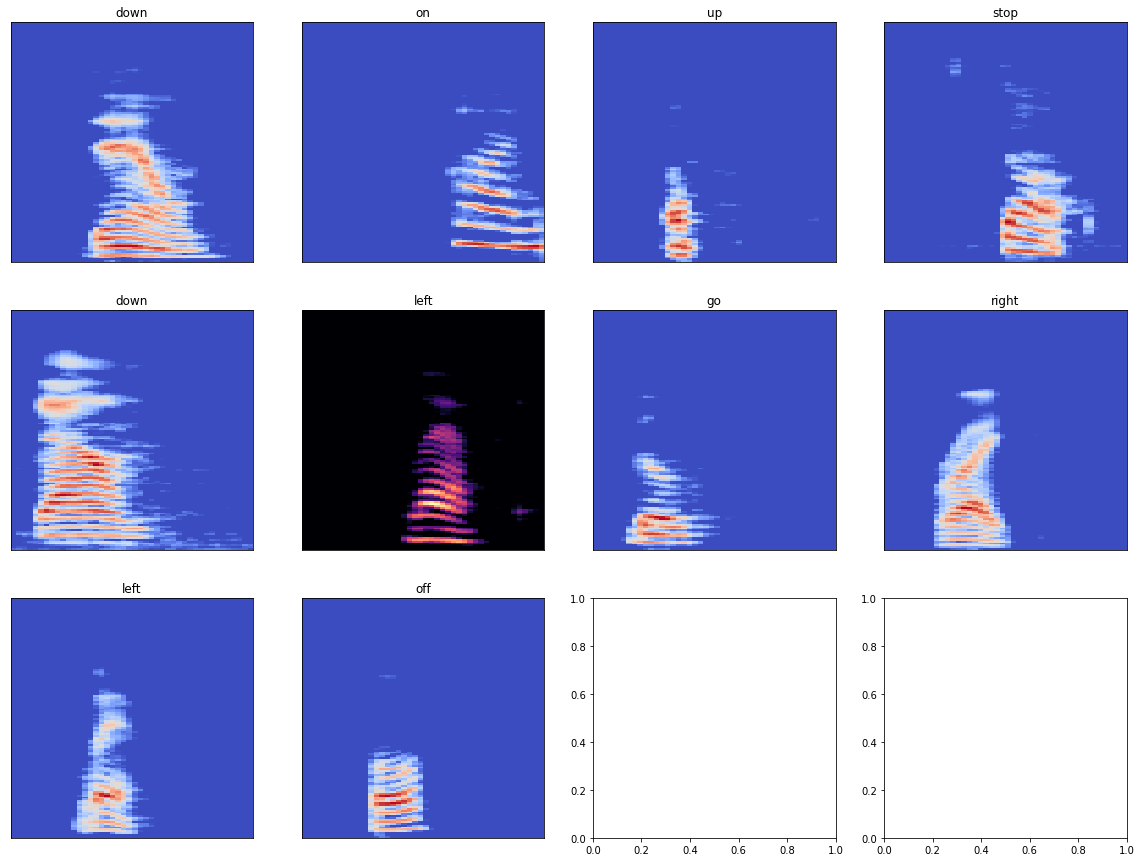

In [17]:
# plot a sample of melspectrograms with different targets

target_melspectrogram = df[['target', 'mel_spectrogram']]

samples = target_melspectrogram.sample(8)
samples['mel_spectrogram'] = samples['mel_spectrogram'].swifter.apply(librosa.amplitude_to_db)

fig, axs = plt.subplots(2, 4, figsize=(20, 15))
for ax, (target, signal) in zip(axs.flatten(), samples.values):
    librosa.display.specshow(signal, ax=ax)
    ax.set_title(target)

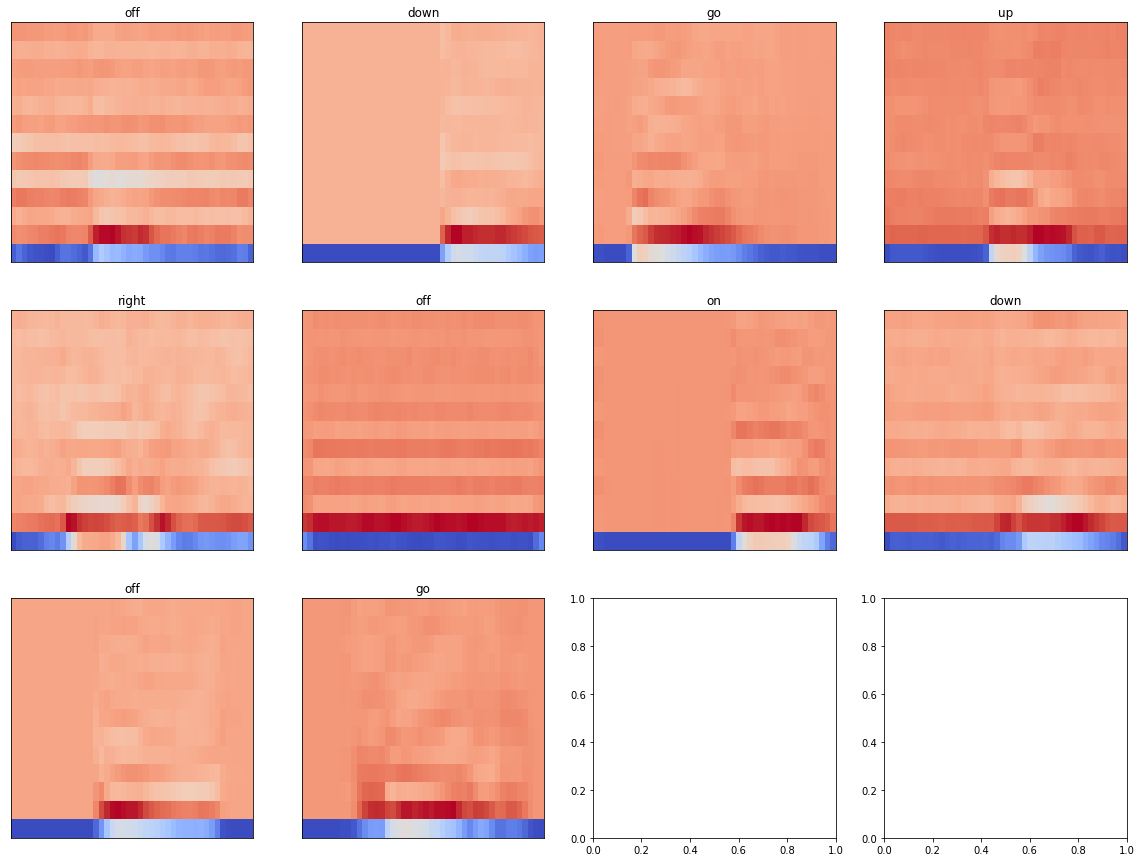

In [48]:
# plot a sample of mfcc with different targets
samples = target_melspectrogram.sample(8)[['target', 'mfcc']]

fig, axs = plt.subplots(2, 4, figsize=(20, 15))
for ax, (target, signal) in zip(axs.flatten(), samples.values):
    librosa.display.specshow(signal, ax=ax)
    ax.set_title(target)